# Applied Data Science Capstone - Week 5 Project 

## Introduction/Business Problem

<html>
    <body>I made a trip to London recently and found that the accommodation is very expensive as compared to the other European countries. When I was choosing an Airbnb apartment, I had difficulty choosing which area to stay. With this project, I hope to be able to help other tourists, like myself, choose a neighborhood to stay in based on selected preferences. For example, Chinese restaurants, threaters, museum, etc. As there are too many <a href='https://en.wikipedia.org/wiki/London_postal_district'>neighborhoods in London</a>, I will just focus on Western Districts.<br><br>
    The targeted customers for my project will be tourists who are new to London, tourists who are trying to identify a new neighborhood to stay, or simply for tourists who are looking for a new neighbor to visit.<br><br>
    Using the solution, the customers will be presented a list of venues and they will be able to select their preferences. Based on the selection, the customers will be recommended neighborhoods to visit.
    </body>
</html> 

## Install and import the necessary libraries

In [1]:
# Install BeautifulSoup and tabulate, if you have not already done so
# !pip install bs4
# !pip install tabulate

In [2]:
import pandas as pd
import numpy as np

import requests

# Import for web page scraping
from bs4 import BeautifulSoup
from tabulate import tabulate

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

# For evaluating kmeans
from sklearn.metrics import silhouette_score

print('Libraries imported.')

Libraries imported.


## Data Extraction and Cleansing

### Scrap the wiki page

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/W_postcode_area")

# Use BeautifulSoup to part the page content based on lxml
soup = BeautifulSoup(res.content,'lxml')

# Use BeatifulSoup to find the table in the page
# table = soup.find_all('table')[0] 
table = soup.find_all('table')[1] 
# table

# Content the table content in the html to a Dataframe
neighborhood_list = pd.read_html(str(table))
df_west_london = pd.DataFrame(neighborhood_list[0])
df_west_london

,Postcode district,Post town,Coverage,Local authority area
0,W1A,LONDON,PO boxes & Admail codes in W1[7],non-geographic
1,W1B,LONDON,"Portland Place, Regent Street",Westminster
2,W1C,LONDON,Oxford Street (west),Westminster
3,W1D,LONDON,"Soho (south east); Chinatown, Soho Square",Westminster
4,W1F,LONDON,Soho (north west),Westminster
5,W1G,LONDON,Harley Street,Westminster
6,W1H,LONDON,Marylebone,Westminster
7,W1J,LONDON,"Mayfair (south), Piccadilly",Westminster
8,W1K,LONDON,"Mayfair (north), Grosvenor Square",Westminster
9,W1S,LONDON,"Mayfair (east), Hanover Square, Savile Row, Ro...",Westminster


### Remove the first row which is reserved for PO Boxes and Admail

In [4]:
df_west_london = df_west_london[1:]
df_west_london.head()

,Postcode district,Post town,Coverage,Local authority area
1,W1B,LONDON,"Portland Place, Regent Street",Westminster
2,W1C,LONDON,Oxford Street (west),Westminster
3,W1D,LONDON,"Soho (south east); Chinatown, Soho Square",Westminster
4,W1F,LONDON,Soho (north west),Westminster
5,W1G,LONDON,Harley Street,Westminster


### Drop Columns Port Town and Local Authority Area

In [5]:
df_west_london.drop(['Post town', 'Local authority area'], axis = 1, inplace = True)
df_west_london.head()

d:\wiotprogram_files\python372\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postcode district,Coverage
1,W1B,"Portland Place, Regent Street"
2,W1C,Oxford Street (west)
3,W1D,"Soho (south east); Chinatown, Soho Square"
4,W1F,Soho (north west)
5,W1G,Harley Street


### Rename the Postcode column to PostalCode

In [6]:
df_west_london.rename(columns = {"Postcode district" : "PostalCode", "Coverage" : "Neighborhood"}, inplace = True)
df_west_london.head()

d:\wiotprogram_files\python372\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,PostalCode,Neighborhood
1,W1B,"Portland Place, Regent Street"
2,W1C,Oxford Street (west)
3,W1D,"Soho (south east); Chinatown, Soho Square"
4,W1F,Soho (north west)
5,W1G,Harley Street


### Print the number of rows in the DataSet

In [7]:
print('The number of row in the Dataset = ', df_west_london.shape[0])

The number of row in the Dataset =  25


## Get Lat and Long based on Postal Code

### Import the Google Map API lib

In [8]:
# Install the library, if you have already done so
!pip install geocoder

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
import geocoder

In [10]:
# Create a PostalCode list
postal_list = df_west_london['PostalCode']
postal_list
# type(postal_list)

1     W1B
2     W1C
3     W1D
4     W1F
5     W1G
6     W1H
7     W1J
8     W1K
9     W1S
10    W1T
11    W1U
12    W1W
13     W2
14     W3
15     W4
16     W5
17     W6
18     W7
19     W8
20     W9
21    W10
22    W11
23    W12
24    W13
25    W14
Name: PostalCode, dtype: object

### Test Retrieval of lat and long based on Postal Code

In [11]:
# Try to retrieve a single PostalCode
postal_code = postal_list.iloc[0]

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, United Kingom, London'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

print("Postal Code = {}, Lat = {}, Long = {}".format(postal_code, latitude, longitude))

Postal Code = W1B, Lat = 51.52013197900004, Long = -0.14536999999995714


In [12]:
# Retrieve lat and long for the postal code list of Toronto
postal_latlng = []

for postal_code in postal_list.iteritems():
    # print('postal_code = ', postal_code)

    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, United Kingom, London'.format(postal_code))
        lat_lng_coords = g.latlng

        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]

        postal_latlng.append([postal_code[1], latitude, longitude])
        # print("Postal Code = {}, Lat = {}, Long = {}".format(postal_code, latitude, longitude))    

postal_latlng

[['W1B', 51.50642000000005, -0.1272099999999341],
 ['W1C', 51.50642000000005, -0.1272099999999341],
 ['W1D', 51.50642000000005, -0.1272099999999341],
 ['W1F', 51.50642000000005, -0.1272099999999341],
 ['W1G', 51.50642000000005, -0.1272099999999341],
 ['W1H', 51.50642000000005, -0.1272099999999341],
 ['W1J', 51.50642000000005, -0.1272099999999341],
 ['W1K', 51.50642000000005, -0.1272099999999341],
 ['W1S', 51.50642000000005, -0.1272099999999341],
 ['W1T', 51.50642000000005, -0.1272099999999341],
 ['W1U', 51.490860000000055, -0.15096999999997252],
 ['W1W', 51.50642000000005, -0.1272099999999341],
 ['W2', 51.51494000000008, -0.1804799999999318],
 ['W3', 51.51324000000005, -0.2674599999999714],
 ['W4', 51.48944000000006, -0.26193999999992457],
 ['W5', 51.51406000000003, -0.30072999999993044],
 ['W6', 51.49617000000006, -0.22934999999995398],
 ['W7', 51.50878000000006, -0.3362999999999374],
 ['W8', 51.50162000000006, -0.19172999999995],
 ['W9', 51.525870000000054, -0.19525999999996202],
 ['

### Merge the Lat and Long to the existing Dataset based on Postal Code

In [13]:
# Convert postal_latlng to Dataframe
df_postal_latlng = pd.DataFrame(postal_latlng)
df_postal_latlng.columns = ['PostalCode', 'Latitude', 'Longitude']
df_postal_latlng.head()

# New Dataframe with Lat and Long
df_west_london_ll = pd.merge(df_west_london, df_postal_latlng, on = 'PostalCode')
df_west_london_ll.head()

,PostalCode,Neighborhood,Latitude,Longitude
0,W1B,"Portland Place, Regent Street",51.50642,-0.12721
1,W1C,Oxford Street (west),51.50642,-0.12721
2,W1D,"Soho (south east); Chinatown, Soho Square",51.50642,-0.12721
3,W1F,Soho (north west),51.50642,-0.12721
4,W1G,Harley Street,51.50642,-0.12721


In [14]:
print('The number of row in the Dataset = ', df_west_london_ll.shape[0])

The number of row in the Dataset =  25


## Cluster Data based on Neighbor Neighborhood

### Define foursquare credentials

In [276]:
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxx
CLIENT_SECRET:xxxx


### Define a function that will retrieve nearby venues from Fourquare

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Use getNearbyVenues to create a list of venues based on West London neighborhood

In [17]:
# Define Search Criteria
radius = 500
LIMIT = 100

west_london_venues = getNearbyVenues(names=df_west_london_ll['Neighborhood'],
                                latitudes=df_west_london_ll['Latitude'],
                                longitudes=df_west_london_ll['Longitude'],
                                radius = radius)


Portland Place, Regent Street
Oxford Street (west)
Soho (south east); Chinatown, Soho Square
Soho (north west)
Harley Street
Marylebone
Mayfair (south), Piccadilly
Mayfair (north), Grosvenor Square
Mayfair (east), Hanover Square, Savile Row, Royal Academy
Fitzrovia, Tottenham Court Road
Marylebone
Great Portland Street, Fitzrovia
Paddington head district: Paddington, Bayswater, Hyde Park, Westbourne Green, Little Venice (part), Notting Hill (part)
Acton district: Acton, West Acton, North Acton (part), South Acton, East Acton (west), Park Royal (south), Hanger Hill Garden Estate, Gunnersbury Park
Chiswick district: Chiswick, Gunnersbury, Turnham Green, Acton Green, South Acton (part), Bedford Park
Ealing district: Ealing, South Ealing, Ealing Common, North Ealing, Northfields, (south and east), Pitshanger, Hanger Lane
Hammersmith district: Hammersmith, Ravenscourt Park, Stamford Brook (part)
Hanwell district: Hanwell, Boston Manor (part)
Kensington district: Kensington, Holland Park (pa

### Examine the West London Venue Dataset

In [18]:
print(west_london_venues.shape)
west_london_venues.head()

(1795, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Portland Place, Regent Street",51.50642,-0.12721,Corinthia Hotel,51.506607,-0.124460,Hotel
1,"Portland Place, Regent Street",51.50642,-0.12721,Trafalgar Square,51.507987,-0.128048,Plaza
2,"Portland Place, Regent Street",51.50642,-0.12721,East Trafalgar Square Fountain,51.508088,-0.127700,Fountain
3,"Portland Place, Regent Street",51.50642,-0.12721,Horse Guards Parade,51.504847,-0.126590,Plaza
4,"Portland Place, Regent Street",51.50642,-0.12721,ESPA Life at Corinthia,51.506402,-0.125114,Spa


### Check how many venues is returned per neighborhood

In [19]:
west_london_venues.groupby('Neighborhood', as_index = False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Acton district: Acton, West Acton, North Acton...",8,8,8,8,8,8
1,"Chiswick district: Chiswick, Gunnersbury, Turn...",39,39,39,39,39,39
2,"Ealing district: Ealing, South Ealing, Ealing ...",91,91,91,91,91,91
3,"Fitzrovia, Tottenham Court Road",100,100,100,100,100,100
4,"Great Portland Street, Fitzrovia",100,100,100,100,100,100
5,"Hammersmith district: Hammersmith, Ravenscourt...",75,75,75,75,75,75
6,"Hanwell district: Hanwell, Boston Manor (part)",12,12,12,12,12,12
7,Harley Street,100,100,100,100,100,100
8,"Kensington district: Kensington, Holland Park ...",64,64,64,64,64,64
9,"Maida Hill district: Maida Hill, Maida Vale, L...",33,33,33,33,33,33


### Check the number of unique venues

In [20]:
print('There are {} uniques categories.'.format(len(west_london_venues['Venue Category'].unique())))

There are 160 uniques categories.


### Organized the Venue Category based on Neighbor

In [21]:
# one hot encoding
west_london_onehot = pd.get_dummies(west_london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# For some unknown reasons, I cannot assign Neighborhood in toronto_onehot
west_london_onehot['Neighborhood'] = west_london_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [west_london_onehot.columns[-1]] + list(west_london_onehot.columns[:-1])
west_london_onehot = west_london_onehot[fixed_columns]

west_london_onehot.head()

,Neighborhood,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bagel Shop,...,Tour Provider,Tourist Information Center,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
0,"Portland Place, Regent Street",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Portland Place, Regent Street",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Portland Place, Regent Street",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Portland Place, Regent Street",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Portland Place, Regent Street",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group the data by Neighborhood and take the mean of the frequency of the categories

In [22]:
west_london_grouped = west_london_onehot.groupby('Neighborhood').mean().reset_index()
west_london_grouped.head()

,Neighborhood,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bagel Shop,...,Tour Provider,Tourist Information Center,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
0,"Acton district: Acton, West Acton, North Acton...",0.00,0.0,0.00,0.00,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.125000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Chiswick district: Chiswick, Gunnersbury, Turn...",0.00,0.0,0.00,0.00,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.025641,0.000000,0.000000,0.0,0.025641
2,"Ealing district: Ealing, South Ealing, Ealing ...",0.00,0.0,0.00,0.00,0.00,0.010989,0.0,0.0,0.010989,...,0.0,0.0,0.010989,0.0,0.010989,0.021978,0.010989,0.010989,0.0,0.000000
3,"Fitzrovia, Tottenham Court Road",0.01,0.0,0.03,0.02,0.01,0.010000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.0,0.000000
4,"Great Portland Street, Fitzrovia",0.01,0.0,0.03,0.02,0.01,0.010000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.0,0.000000


### Print the Top 5 venues in each neighborhood

In [23]:
num_top_venues = 5

for hood in west_london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = west_london_grouped[west_london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----Acton district: Acton, West Acton, North Acton (part), South Acton, East Acton (west), Park Royal (south), Hanger Hill Garden Estate, Gunnersbury Park----
                venue  freq
0   Indian Restaurant  0.12
1       Train Station  0.12
2  Miscellaneous Shop  0.12
3       Grocery Store  0.12
4      Breakfast Spot  0.12
----Chiswick district: Chiswick, Gunnersbury, Turnham Green, Acton Green, South Acton (part), Bedford Park----
                venue  freq
0                 Pub  0.10
1  Italian Restaurant  0.08
2                Café  0.08
3              Bakery  0.08
4           Bookstore  0.08
----Ealing district: Ealing, South Ealing, Ealing Common, North Ealing, Northfields, (south and east), Pitshanger, Hanger Lane----
            venue  freq
0     Coffee Shop  0.12
1             Pub  0.09
2        Platform  0.04
3  Clothing Store  0.04
4        Bus Stop  0.03
----Fitzrovia, Tottenham Court Road----
         venue  freq
0        Hotel  0.09
1     Wine Bar  0.04
2      Theater  

### Create a function to store the top n venues of each neighborhood into a dataframe

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Run the function to create a dataframe of top 10 venues in each neighborhood in Western London

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = west_london_grouped['Neighborhood']

for ind in np.arange(west_london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(west_london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acton district: Acton, West Acton, North Acton (part), South Acton, East Acton (west), Park Royal (south), Hanger Hill Garden Estate, Gunnersbury Park",Miscellaneous Shop,Indian Restaurant,Park,Train Station,Gas Station,Convenience Store,Grocery Store,Breakfast Spot,Yoga Studio,Farmers Market
1,"Chiswick district: Chiswick, Gunnersbury, Turnham Green, Acton Green, South Acton (part), Bedford Park",Pub,Italian Restaurant,Bookstore,Café,Bakery,Coffee Shop,Supermarket,Yoga Studio,Creperie,Restaurant
2,"Ealing district: Ealing, South Ealing, Ealing Common, North Ealing, Northfields, (south and east), Pitshanger, Hanger Lane",Coffee Shop,Pub,Clothing Store,Platform,Bus Stop,Bakery,Italian Restaurant,Pizza Place,Burger Joint,Thai Restaurant
3,"Fitzrovia, Tottenham Court Road",Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
4,"Great Portland Street, Fitzrovia",Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar


### Prepare the data for Clustering by dropping the Neighborhood column

In [26]:
west_london_clustering_data = west_london_grouped.drop('Neighborhood', 1)

### Identify the optimal K based on the data

In [27]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(west_london_clustering_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(west_london_clustering_data, labels, metric = 'euclidean'))

print('The maximum silhouette is {} and the optimal K is {}'.format(np.amax(sil), np.argmax(sil)))

optimalK = np.argmax(sil)

The maximum silhouette is 0.43595938047151234 and the optimal K is 7


### Cluster the Neighborhood using Kmeans

In [28]:
# set number of clusters
kclusters = optimalK

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(west_london_clustering_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 1, 1, 2, 2, 1, 4, 2, 2, 1])

### Export the content of west_london_clustering_data to a csv file so that it can be used in future projects

In [29]:
west_london_clustering_data.to_csv(path_or_buf = 'west_london_clustering_data.csv', index = False)

In [30]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acton district: Acton, West Acton, North Acton...",Miscellaneous Shop,Indian Restaurant,Park,Train Station,Gas Station,Convenience Store,Grocery Store,Breakfast Spot,Yoga Studio,Farmers Market
1,"Chiswick district: Chiswick, Gunnersbury, Turn...",Pub,Italian Restaurant,Bookstore,Café,Bakery,Coffee Shop,Supermarket,Yoga Studio,Creperie,Restaurant
2,"Ealing district: Ealing, South Ealing, Ealing ...",Coffee Shop,Pub,Clothing Store,Platform,Bus Stop,Bakery,Italian Restaurant,Pizza Place,Burger Joint,Thai Restaurant
3,"Fitzrovia, Tottenham Court Road",Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
4,"Great Portland Street, Fitzrovia",Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar


### Add the venues back to the cluster for further analysis

In [149]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

west_london_merged = df_west_london_ll

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
west_london_merged = west_london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

west_london_merged.head() # check the last columns!

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,W1B,"Portland Place, Regent Street",51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
1,W1C,Oxford Street (west),51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
2,W1D,"Soho (south east); Chinatown, Soho Square",51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
3,W1F,Soho (north west),51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
4,W1G,Harley Street,51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar


### Visualize the cluster using folium map

In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# map_clusters = folium.Map(location=[51.509865, -0.118092], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(west_london_merged['Latitude'], west_london_merged['Longitude'], west_london_merged['Neighborhood'], west_london_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    # print('ys {}, lat {}, long {}, poi {}, cluster {}'.format(len(ys), lat, lon, poi, cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Store the content of the west_london_merged to an csv so that it can be used for future assignment

In [33]:
west_london_merged.to_csv(path_or_buf = 'west_london_merged.csv', index = False)

## Identify what is unique about each cluster
<body> Going to use Word Cloud and Sets to find the uniqueness

In [34]:
west_london_merged.head()

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,W1B,"Portland Place, Regent Street",51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
1,W1C,Oxford Street (west),51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
2,W1D,"Soho (south east); Chinatown, Soho Square",51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
3,W1F,Soho (north west),51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar
4,W1G,Harley Street,51.50642,-0.12721,2,Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar


### Import the necessary libraries for WordCloud

In [54]:
# install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# import for plotting Word Cloud
import matplotlib.pyplot as plt

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
stopwords = set(STOPWORDS)

### Concatenate all the venues within a cluster into a single string

In [81]:
# Select 1 row from cluster 1
# pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

dfTemp = west_london_merged
dfTemp.drop_duplicates(subset = "Cluster Labels", inplace = True)
dfTemp

venueText = dfTemp.iloc[:, 4:]
venueText.sort_values(by = 'Cluster Labels', inplace = True)
venueText['combined'] = venueText.iloc[:, 1:].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
venueText[['Cluster Labels','combined']]

,Cluster Labels,combined
23,0,"Grocery Store,Hotel,Persian Restaurant,Indian Restaurant,Platform,Gastropub,Pub,Supermarket,Cosmetics Shop,Greek Restaurant"
14,1,"Pub,Italian Restaurant,Bookstore,Café,Bakery,Coffee Shop,Supermarket,Yoga Studio,Creperie,Restaurant"
0,2,"Hotel,Wine Bar,Plaza,Theater,Outdoor Sculpture,Art Gallery,Monument / Landmark,Mexican Restaurant,Garden,Cocktail Bar"
22,3,"Grocery Store,Park,Gastropub,Indian Restaurant,Pub,Event Space,Soccer Stadium,Middle Eastern Restaurant,Chinese Restaurant,Fast Food Restaurant"
17,4,"Pub,Café,Train Station,Fish & Chips Shop,Music Store,Supermarket,Gym,Pizza Place,Coffee Shop,Discount Store"
12,5,"Hotel,Café,Coffee Shop,Pub,Italian Restaurant,Restaurant,Garden,Fast Food Restaurant,Lebanese Restaurant,Hostel"
13,6,"Miscellaneous Shop,Indian Restaurant,Park,Train Station,Gas Station,Convenience Store,Grocery Store,Breakfast Spot,Yoga Studio,Farmers Market"


### Word Cluster for Cluster 0

In [127]:
# instantiate a word cloud object
cluster_wc = []

cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[0, 11])

### Word Cluster for Cluster 1

In [128]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[1, 11])

In [129]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[2, 11])

In [130]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[3, 11])

In [131]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[4, 11])

In [132]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[5, 11])

In [133]:
# instantiate a word cloud object
cluster_wc.append(WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
))

# generate the word cloud
cluster_wc[len(cluster_wc) - 1].generate(venueText.iloc[6, 11])

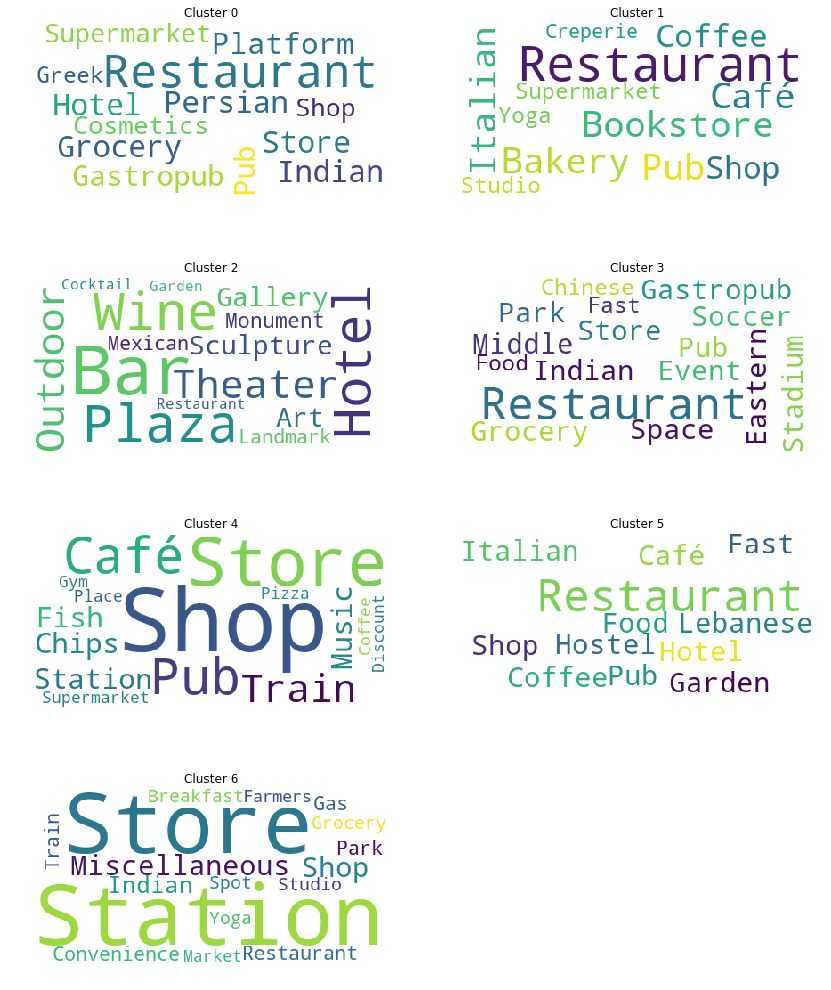

In [140]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

for i in range(len(cluster_wc)):
    ax = fig.add_subplot(4, 2, i + 1)
    ax.set_title('Cluster ' + str(i))

    ax.imshow(cluster_wc[i])
    ax.axis('off')

### Count the number of Neighborhood in each cluster

In [153]:
west_london_merged['Cluster Labels'].value_counts()

2    13
1    6 
5    2 
6    1 
4    1 
3    1 
0    1 
Name: Cluster Labels, dtype: int64

### Count the number of unique venues in the 7 clusters

In [175]:
Row_list = []

for i in range((dfTemp.shape[0])): 
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list.extend(dfTemp.iloc[i, 5:]) 

# Print the list 
print(Row_list)
print('Number of venues in set = ', len(Row_list))

['Hotel', 'Wine Bar', 'Plaza', 'Theater', 'Outdoor Sculpture', 'Art Gallery', 'Monument / Landmark', 'Mexican Restaurant', 'Garden', 'Cocktail Bar', 'Hotel', 'Café', 'Coffee Shop', 'Pub', 'Italian Restaurant', 'Restaurant', 'Garden', 'Fast Food Restaurant', 'Lebanese Restaurant', 'Hostel', 'Miscellaneous Shop', 'Indian Restaurant', 'Park', 'Train Station', 'Gas Station', 'Convenience Store', 'Grocery Store', 'Breakfast Spot', 'Yoga Studio', 'Farmers Market', 'Pub', 'Italian Restaurant', 'Bookstore', 'Café', 'Bakery', 'Coffee Shop', 'Supermarket', 'Yoga Studio', 'Creperie', 'Restaurant', 'Pub', 'Café', 'Train Station', 'Fish & Chips Shop', 'Music Store', 'Supermarket', 'Gym', 'Pizza Place', 'Coffee Shop', 'Discount Store', 'Grocery Store', 'Park', 'Gastropub', 'Indian Restaurant', 'Pub', 'Event Space', 'Soccer Stadium', 'Middle Eastern Restaurant', 'Chinese Restaurant', 'Fast Food Restaurant', 'Grocery Store', 'Hotel', 'Persian Restaurant', 'Indian Restaurant', 'Platform', 'Gastropub', 

### Count the occurance of each venue

In [197]:
# Create an empty dictionary
venueCount = {}

for venue in Row_list:
    # print("Number of ", venue, " = ", Row_list.count(venue))
    venueCount[venue] = Row_list.count(venue)


dfVenueCount = pd.DataFrame.from_dict(venueCount, orient='index')
dfVenueCount.reset_index(inplace = True)
dfVenueCount.rename(columns = {"index" : "Venue", 0 : "Count"}, inplace = True)
dfVenueCount.sort_values(by = "Count", ascending = False, inplace = True)
dfVenueCount

,Venue,Count
12,Pub,5
0,Hotel,3
10,Café,3
24,Grocery Store,3
19,Indian Restaurant,3
11,Coffee Shop,3
30,Supermarket,3
14,Restaurant,2
20,Park,2
26,Yoga Studio,2


In [199]:
# Convert list to set to get the distinct venues
sVenues = set(Row_list)

# Print the set
print(sVenues)
print('Number of unique venues in the 7 clusters = ', len(sVenues))

{'Farmers Market', 'Hostel', 'Gym', 'Plaza', 'Soccer Stadium', 'Platform', 'Middle Eastern Restaurant', 'Bakery', 'Event Space', 'Fast Food Restaurant', 'Park', 'Gastropub', 'Cosmetics Shop', 'Café', 'Persian Restaurant', 'Chinese Restaurant', 'Yoga Studio', 'Monument / Landmark', 'Fish & Chips Shop', 'Breakfast Spot', 'Pub', 'Gas Station', 'Train Station', 'Convenience Store', 'Greek Restaurant', 'Bookstore', 'Wine Bar', 'Hotel', 'Cocktail Bar', 'Supermarket', 'Discount Store', 'Coffee Shop', 'Italian Restaurant', 'Creperie', 'Pizza Place', 'Grocery Store', 'Outdoor Sculpture', 'Garden', 'Restaurant', 'Art Gallery', 'Miscellaneous Shop', 'Theater', 'Mexican Restaurant', 'Indian Restaurant', 'Lebanese Restaurant', 'Music Store'}
Number of unique venues in the 7 clusters =  46


# Demonstrate how the model can be put to work

## User can be showed the full list of 46 selection.
### To simplify, I would suggest showing top 20 or making the venues more generic. For example, restaurants instead of Chinese, Indian, or Greek restaurants.

### Lets asumme the user made the under-mentioned selection as preferences.

In [245]:
custSelect = dfVenueCount.head(10)
custSelect = (custSelect['Venue'].to_frame()).transpose()

header = custSelect.iloc[0]
custSelect.rename(columns = header, inplace = True)

for col in custSelect.columns:
    custSelect[col].values[:] = 1
custSelect

,Pub,Hotel,Café,Grocery Store,Indian Restaurant,Coffee Shop,Supermarket,Restaurant,Park,Yoga Studio
Venue,1,1,1,1,1,1,1,1,1,1


### Prepare the score data. Its has to be 160 columns of values between 0 and 1

In [246]:
# Reference to the original kmeans model
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(west_london_clustering_data)

# Create scoring data using first row in the clustering data set and set all values to 0
scoreData = pd.DataFrame(west_london_clustering_data.iloc[1,:]).T
for col in scoreData.columns:
    scoreData[col].values[:] = 0

# Set values in the scoring set to 1 based on user select
for (columnName, columnData) in custSelect.iteritems():
    scoreData[columnName] = 1
scoreData


,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,...,Tour Provider,Tourist Information Center,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Show predicted cluster and recommended neighbourhood

In [254]:
Results = kmeans.predict(scoreData)
print('The customer selection fits cluster ', Results[0])

print('We will recommend the following Neighbourhood(s)')

print(west_london_merged.loc[west_london_merged['Cluster Labels'] == Results[0], ['Neighborhood']].to_string(header = False, index = False))

The customer selection fits cluster  4
We will recommend the following Neighbourhood(s)
 Hanwell district: Hanwell, Boston Manor (part)


### Generate customer selection based on random number

In [274]:
import random

# Pick 10 numbers randomly out of 46
randomSelect = random.sample(range(0, 46), 10)

venueList = list(sVenues)

# Create scoring data using first row in the clustering data set and set all values to 0
scoreData2 = pd.DataFrame(west_london_clustering_data.iloc[1,:]).T
for col in scoreData2.columns:
    scoreData2[col].values[:] = 0

print('Customer has selected the following venues :')
for i in randomSelect:
    print(venueList[i])
    scoreData2[venueList[i]] = 1

scoreData2    

Customer has selected the following venues :
Supermarket
Soccer Stadium
Monument / Landmark
Lebanese Restaurant
Chinese Restaurant
Farmers Market
Music Store
Train Station
Indian Restaurant
Plaza


,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,...,Tour Provider,Tourist Information Center,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
Results2 = kmeans.predict(scoreData2)
print(Results2)
print('The customer selection fits cluster ', Results2[0])

print('We will recommend the following Neighbourhood(s)')

print(west_london_merged.loc[west_london_merged['Cluster Labels'] == Results2[0], ['Neighborhood']].to_string(header = False, index = False))

[6]
The customer selection fits cluster  6
We will recommend the following Neighbourhood(s)
 Acton district: Acton, West Acton, North Acton (part), South Acton, East Acton (west), Park Royal (south), Hanger Hill Garden Estate, Gunnersbury Park
